In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
import scipy.stats as spy

In [2]:
df = pd.read_csv("data/car_design.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## A: Data Wrangling

In [3]:
#Thông tin bộ dữ liệu
print("Bộ dữ liệu có", df.ndim, "chiều")

Bộ dữ liệu có 2 chiều


In [4]:
#Kích thước bộ dữ liệu
print("Bộ data có", df.shape[0], "dòng và", df.shape[1], "cột")

Bộ data có 205 dòng và 26 cột


#### Nêu các kiểu dữ liệu, có bao nhiêu dữ liệu là số, bao nhiêu không phải là số

In [5]:
print("Kiểu dữ liệu:")
print(df.dtypes)

Kiểu dữ liệu:
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [6]:
#tổng số thuộc tính là số và không phải là số
count = [1 for i in df.columns if df[i].dtypes == "int64" or df[i].dtypes == "float64"]
print("Tổng thuộc tính là giá trị số là: ", sum(count), "\nKhông phải là giá trị số: ", len(df.columns)-sum(count))

Tổng thuộc tính là giá trị số là:  10 
Không phải là giá trị số:  16


In [7]:
#Thay thế "?" bằng giá trị Nan
df = df.replace("?", np.nan)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
#Tổng giá trị Null của các cột
df[df.columns[df.isnull().any()]].isnull().sum()

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

#### Điền các giá trị còn thiếu bằng trung bình của mỗi cột

In [9]:
for i in ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]:
    df[i] = df[i].fillna(round(df[i].dropna().astype("float64").mean(), 2))

#### Điền số lượng cửa bằng số lượng cửa cho thực tế là 4

In [10]:
no_of_doors = {"one":1, "two":2, "three":3, "four":4}
num = spy.mode([no_of_doors.get(i) for i in df['num-of-doors'] if i in no_of_doors])
df['num-of-doors'] = df['num-of-doors'].fillna(list(no_of_doors.keys())[list(no_of_doors.values()).index(num.mode[0])])

In [11]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# B: Tóm tắt thống kê

In [14]:
# thuộc tính thống kê của tất cả các thuộc tính số
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Nhận xét thuộc tính:
- giá trị max ở 3 cột (symboling, engine-size, compression-ratio) lớn hơn nhiều so với giá trị mean

## Một số suy luận thêm có thể ảnh hưởng đến thuật toán

In [15]:
print(df[df["symboling"]== -2]["make"].unique())
print(df[df["symboling"]== 3]["make"].unique())
print(df[df["symboling"]== 0]["make"].unique())

['volvo']
['alfa-romero' 'dodge' 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan'
 'plymouth' 'porsche' 'saab' 'toyota' 'volkswagen']
['audi' 'bmw' 'chevrolet' 'honda' 'isuzu' 'jaguar' 'mazda' 'mercedes-benz'
 'nissan' 'peugot' 'renault' 'subaru' 'toyota' 'volkswagen']


Từ kết  quả trên chúng ta có nhận xét:
- có 11 hãng sản xuất ô tô là không an toàn ở 3
- -2 cho thấy, có những chiếc xe an toàn nhất và không có công ty auto nào khác
- 14 chiếc xe ở độ trung tính về rủi ro hay là không có rủi ro

# C: Trực quan hóa data

#### Trực quan hóa cho 4 cột: "engine-size", "peak-rpm","horsepower","price"

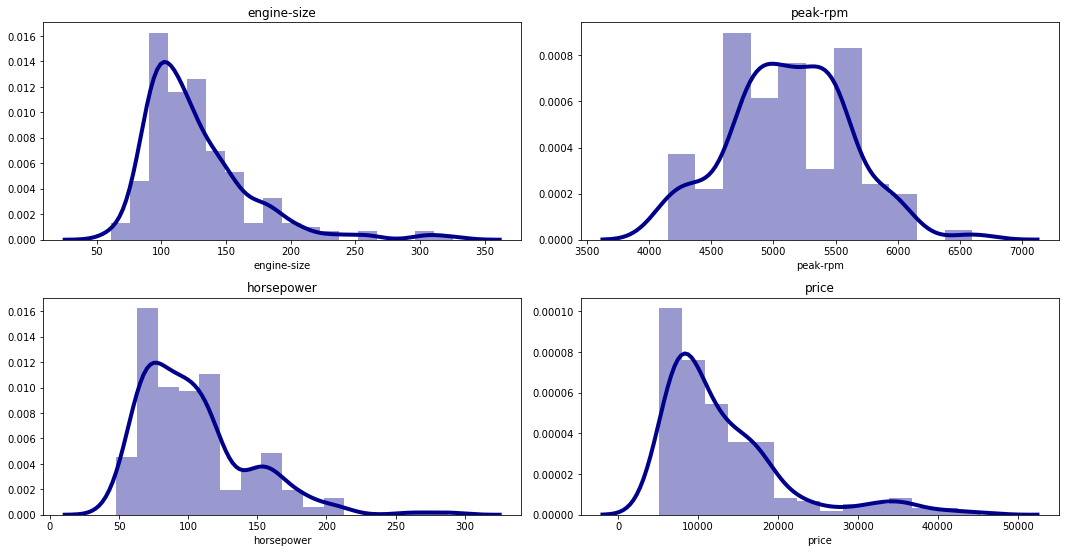

In [16]:
hist_col_name = ["engine-size", "peak-rpm","horsepower","price"]
for i in hist_col_name:
    df[i] = df[i].astype(float) #Thay dổi dữ liệu

plt.figure(figsize=(15, 15))
count = 1
for i in hist_col_name:
    plt.subplot(4, 2, count)
    sns.distplot(df[i], hist=True, color = 'darkblue', kde_kws={'linewidth': 4})
    plt.title(i)
    count = count +1

plt.tight_layout()
plt.show()

Nhận xét:
- ở engine-size, dữ liệu được tích lũy nhiều hơn trong khoảng từ 50 đến 200, lệch dương
- Hầu hết các giá trị đều lệch về giá trị bên trái so với giá trị trung bình

### Vẽ một ma trận thể hiện sự tương quan giữa các thuộc tính:

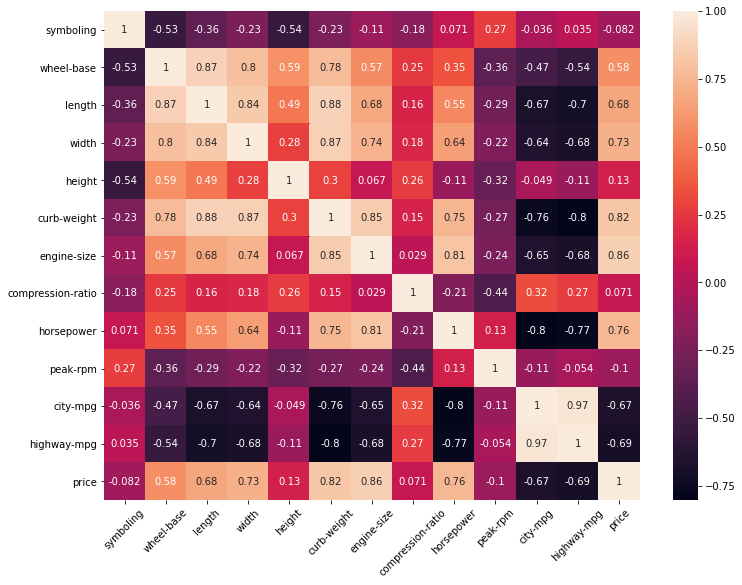

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show()

Kết quả

- 1) Chỉ báo được hiển thị ở phía bên phải của bản đồ nhiệt cho biết mối quan hệ sẽ tích cực với negtaive khi chúng ta đi từ trên xuống dưới.
- 2) Trong bản đồ nhiệt của ma trận ăn mòn, chúng ta có thể thấy rằng các giá trị đường chéo từ góc trên bên trái đến góc dưới bên phải là 1, vì nó cho thấy sự ăn mòn của cột với chính nó.
- 3) Trong đó, chúng tôi đã phát hiện ra rằng, city-mpg và Highway-mpg có độ ăn mòn dương cao nhất, tức là 0,97,
- 4) Tương tự thành phố-mpg và mã lực & đường cao tốc-mpg và trọng lượng lề đường có độ ăn mòn âm thấp nhất, tức là -0,8.

## Sử dụng boxplot đẻ thấy các mối quan hệ

In [19]:
#Đối tượng ở đây là body-styles
body_styles = list(df["body-style"].unique())
body_styles_list = []
for i in body_styles:
    body_styles_list.append(df["price"][df["body-style"]== i])

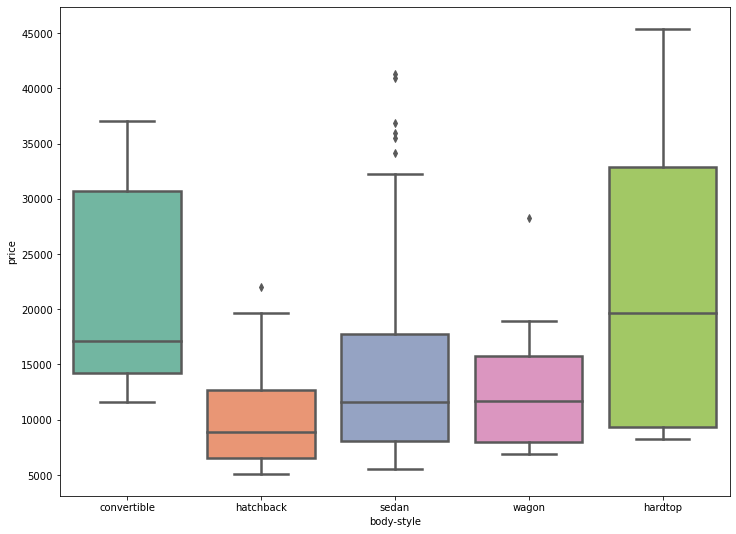

In [20]:
plt.figure(figsize=(12, 9))
sns.boxplot(df["body-style"], y=df['price'], linewidth=2.5, palette="Set2")
plt.show()

Kết quả:
- Chúng ta có thể thấy, 'hatchback' có giá trị thấp nhất và "hardtop" có giá trị cao nhất

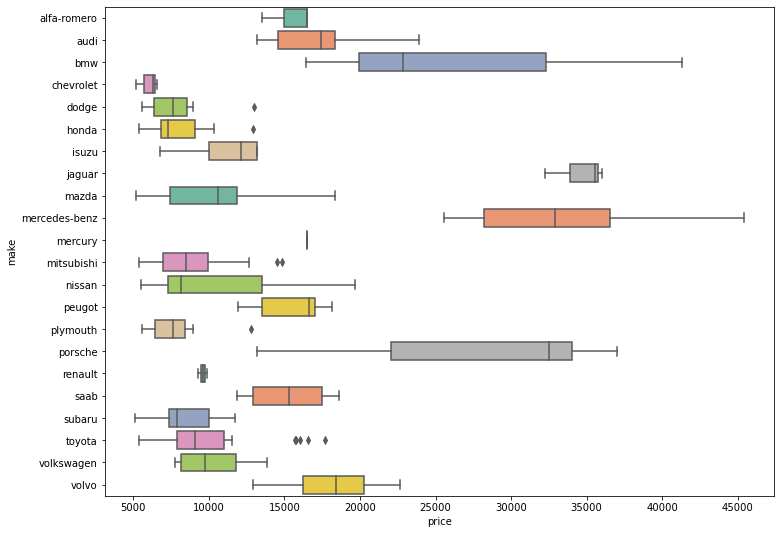

In [22]:
#sự tương quan giữa cột "make" và cột "price"
plt.figure(figsize=(12, 9))
sns.boxplot(df['price'], df['make'], linewidth=1.5, orient='h', palette ='Set2');

Kết quả

- Ở đây chúng ta có thể thấy rằng theo làm cho Ô tô được chia thành 3 loại theo giá:

    - Giá thấp (5000-12000) - Chevrolet, Dodge, Honda, v.v.
    - Danh mục giá trung bình (12000-20000) - Volvo, Peugot, Mercury, v.v.
    - Danh mục giá cao (20000 trở lên) - BMW, Jaguar, Mercedes-benz, v.v.

### Kiểm tra mối quan hệ giữa engine-size và price 

Hệ số tương quan:  0.8617522437476117


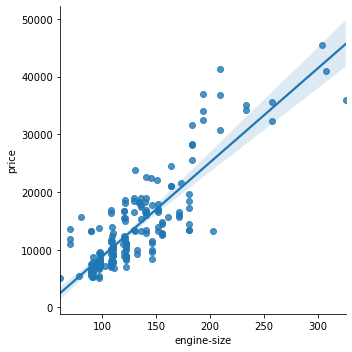

In [24]:
x = df["engine-size"]
y = df["price"]
a = spy.pearsonr(x, y)
print("Hệ số tương quan: ",a[0])
sns.lmplot(x="engine-size", y="price", data= df);

Ta thấy rằng: kích thước động cơ có liên quan đến giá trị, kích thước càng lớn thì giá trị càng cao

### Kiểm tra mỗi liên hệ giữa City-MPG và Hightwat-MPG

Hệ số tương quan:  0.9713370423425046


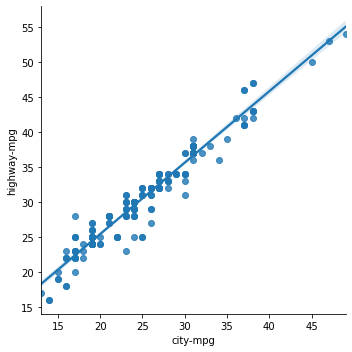

In [27]:
x = df["city-mpg"]
y = df["highway-mpg"]
a = spy.pearsonr(x, y)
print("Hệ số tương quan: ",a[0])
sns.lmplot(x="city-mpg", y="highway-mpg", data= df);

Chúng ta cũng dễ dàng nhận thấy rằng: Hai giá trị trên có cùng mối quan hệ, city-mpg tawgn thì highway-mpg cũng tăng theo

### Kiểm tra mối liên hệ giữa engine-size và city-mpg

Hệ số tương quan:  -0.6536579163114199


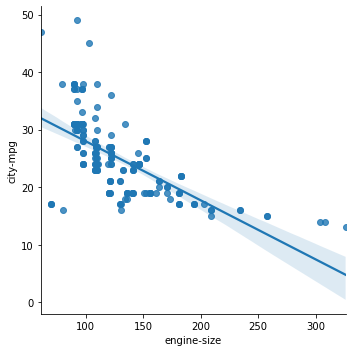

In [30]:
x = df["engine-size"]
y = df["city-mpg"]
a = spy.pearsonr(x, y)
print("Hệ số tương quan: ", a[0])
sns.lmplot(x="engine-size", y="city-mpg", data = df );

nhận xét: 2 cột này tỉ lệ nghịch với nhau: nếu engine-size tăng thì city-mpg giảm

### Số bánh xe ảnh hưởng đến phạm vi giá như thế nào

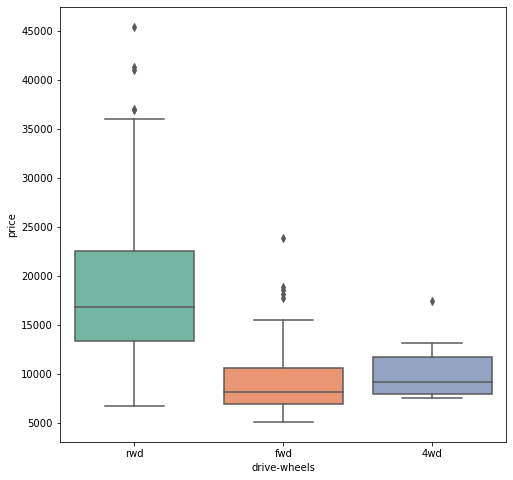

In [33]:
plt.figure(figsize=(8,8))
sns.boxplot(x="drive-wheels", y="price", data=df, linewidth=1.5, palette="Set2");

Ở đây chúng ta có thể thấy rõ rằng:

- Xe bánh sau có giá cao, tức là trong phạm vi 12000 đến 36000
- Xe ô tô chuyển tiếp có giá thấp nhất, trong phạm vi 5000 đến 15000

### Giá trị trung bình của các loại bánh

In [36]:
df_group = df[["drive-wheels", "body-style", "price"]]
drive_wheels_avg = df_group.groupby(["drive-wheels"], as_index=False).mean()

In [37]:
drive_wheels_avg

,drive-wheels,price
0,4wd,10570.570000
1,fwd,9310.818833
2,rwd,19671.422763


Giá trung bình của Bánh sau là cao nhất trong khi đối với Bánh trước và 4 Bánh là tương đương nhau.

### Đánh giá giá trị của drive-wheels thông qua body-style

In [38]:
group_avg = df_group.groupby(["drive-wheels", "body-style"], as_index=False).mean()
group_avg

,drive-wheels,body-style,price
0,4wd,hatchback,10405.065000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934386
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Ở đây, chúng ta có thể thấy giá trị của drive-wheels phụ thuộc vào body-style

### Ở đây đã chuyển đổi bảng trên thành bảng xoay vòng để có chế độ xem chính xác để hiểu rõ hơn

In [39]:
pivot_table=group_avg.pivot(index='drive-wheels', columns='body-style')
pivot_table=pivot_table.fillna('Not Applicable')
pivot_table

price                                              \
body-style       convertible         hardtop     hatchback         sedan   
drive-wheels                                                               
4wd           Not Applicable  Not Applicable  10405.065000  12647.333333   
fwd                    11595            8249   8396.387755   9930.934386   
rwd                  23949.6         24202.7  14278.270000  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Như vậy là có thể định giá xe hơi dựa trên bảng trên